# Problemas do Capítulo 1

Nos exercícios que se seguem vamos com frequência nos interessar pela ordem de magnitude dos valores.

Para tanto provemos a função `order_of_magnitude`, que em Julia é declarada como se segue:

In [1]:
function order_of_magnitude(x)
    Int(round(log10(x)))
end

order_of_magnitude (generic function with 1 method)

## 1.1

Estime o número de fios de cabelo que você tem na sua cabeça.

---

Sei que o comprimento da minha palma da mão é de 21 cm, então estimo grosseiramente que minha cabeça seja uma esfera de diâmetro de 15 cm. Uma pesquisa rápida mostra que um fio de cabelo varia entre 50 e 120 microns de diâmetro. Com esses valores posso rapidamente calcular a área de minha cabeça e de um fio de cabelo.

In [2]:
D_head = 0.15;

D_hair = 100e-06;

A_head = 4 * pi * (D_head / 2)^2;

A_hair = pi * (D_hair / 2)^2;

A cabeça no entanto não é somente cabelo. Considerando que a face mas a região do pescoço ocupam cerca de dois terços da área disponível na minha *esfera*, a área efetivamente coberta pour cabelo pode ser avaliada como se segue.

In [3]:
hair_covered_frac = 1 / 3;

A_head_hair = hair_covered_frac * A_head;

Se você for olhar de perto a cabeça de alguém, se dará conta que existe uma distância entre os fios de cabelo razoávelmente superior ao seu raio. Assumindo que para cada fio haja uma área de 30 vezes a de sua própria de pele nos leva ao cálculo final:

In [4]:
hair_influence_area = 30;

n_hair = A_head_hair / (hair_influence_area * A_hair);

order_of_magnitude(n_hair)

5

É de se esperar, se você não for calvo como eu, que em algum momento já tiveste cerca de $10^5$ fios de cabelo!

## 1.2

Estime o número de folhas de uma árvore.

---

Imagine uma árvore de porte médio, com as extremidades de suas folhas cobrindo um raio $R$ de 3 m. Suponha que as folhas sejam aproximadamente retangulares com dimensões de 3x5 cm. Com esses valores calculamos as áreas externa da árvore de de uma folha, sua razão aproximando o número de folhas. Como as ramificações da árvore também criam folhas em camadas mais internas, podemos assumir que  essa estimação seja um limite inferior, o verdadeiro valor sendo de 2 à 5 vezes essa primeira estimativa.

In [5]:
R = 3.0;

l = 0.05;

w = 0.03;

A_tree = 4 * pi * R^2;

A_leaf = l * w;

n_leaves = A_tree / A_leaf;

order_of_magnitude(n_leaves)

5

## 1.3

Estime o volume ocupado pelo número de notas de R$ 1,00, correspondente à dívida externa do Brasil. Se pudessem ser empilhadas, que altura atingiria a pilha?

---

Tomemos como ponto de partida o valor de R$ 6 trilhões ($6\times10^{12}$). Um bloco de 100 notas virgens tem aproximadamente 1 cm.

Logo podemos computar a espessura de uma única nota em metros, o que terá unidades de [m/R$].

In [6]:
external_debt = 6.0e+12;

bill_thickness = 0.01 / 100;

Multiplicando a dívida pela espessura de numa nota por R$ temos as espessura total.

Para que o valor seja mais facilmente interpretável, dividimos por 1000 para expressar em quilômetros.

In [7]:
total_thickness = bill_thickness * external_debt;

total_thickness / 1000

600000.0

## 1.4

Estime o número médio de gotas de chuva que caem sobre uma área de 1 km² para uma precipitação de 1 cm de chuva.

---

Primeiro vamos computar o volume de água correspondente à 1000 m x 1000 m x 0,01 m.

In [8]:
water_volume = 1000.0^2 * 0.01;

Gotas de até cerca de 2 mm tendem a manter uma forma aproximadamente esférica, então temos:

In [9]:
droplet_volume = (4/3) * pi * 0.002^3;

Finalmente podemos calcular o número de gotas por quilômetro quadrado como sendo:

In [10]:
n_droplets = water_volume / droplet_volume

order_of_magnitude(n_droplets)

11

## 1.5

(a) Estime o número de grãos de areia da praia de Copacabana (ou de outra que você conheça melhor). (b) Estime o número de átomos contido num grão de areia. Compare as duas estimativas.

---

Começamos pelo cálculo do volume de um grão de areia *típico* de 0,2 mm de diâmetro.

In [11]:
grain_diameter = 0.0002;

grain_volume = (4/3) * pi * (grain_diameter / 2)^3;

Em seguida computamos o volume de areia na praia, assumindo um comprimento de 4000m por uma faixa de areia de 150m e profundidade de 1m. 

Esse é o volume da *caixa* contendo toda a areia da praia, no entanto há bastante espaço entre os grãos e a teoria de empacotamento nos permite de encontrar uma [fração sólida de empacotamento](https://en.wikipedia.org/wiki/Random_close_pack) razoável para essa situação da ordem de 0,56 (na verdade como os tamanhos de grão podem ser polidispersos, frações superiores podem ser possíveis, você pode ir a praia medir a real por conta própria, mas para fins de estimação de ordem de grandeza usar 0,4 ou 0,9 não mudará o resultado). 

In [12]:
beach_volume_per_m = 4000 * 150 * 1;

packing_fraction = 0.56;

sand_volume = packing_fraction * beach_volume_per_m;

O número de grãos então é computado pela razão entre o volume de areia e o volume de um grão.

In [13]:
n_grains = sand_volume / grain_volume;

order_of_magnitude(n_grains)

17

Assumamos aqui que a areia é formada apenas de $SiO_2$ que tem uma densidade de 2650 $kg\cdotp{}m^{-3}$ e uma massa molar de 60,08 $g\cdotp{}mol^{-1}$. Podemos então calcular a massa de um grão e em seguida o número de moles de fórmula unitária por grão. Em conhecimento do número de Avogrado e sabendo que temos 3 átomos por fórmula, temos a seguinte aproximação.

In [14]:
rho_sio2 = 2650.0;

mw_sio2 = 0.06008;

n_avogradro = 6.02e+23;

m_grain = rho_sio2 * grain_volume;

n_moles = m_grain / mw_sio2;

n_atoms = 3 * n_avogradro * n_moles;

order_of_magnitude(n_atoms)

18

## 1.6

Em cada inspiração, absorvemos cerca de 15% do oxigênio que penetra em nossos pulmões. Num típico elevador lotado de um prédio de apartamentos, preso entre dois andares, quanto tempo levaria para que 10% do oxigênio contido na cabine fosse consumido?

## 1.7

Quanto tempo leva a luz do Sol para chegar até a Terra? E até Plutão?

## 1.8

Estima-se que a densidade média de matéria no universo corresponde a da ordem de 0,2 átomos de hidrogênio por m³. (a) Estime a massa total contida dentro do raio do universo; (b) Estime o número total de núcleons (neutrons e prótons) contido nesse volume; (c) Compare a densidade média de matéria no universo com a densidade típica no interior do núcleo atômico.


## 1.9

A população atual (2012) da Terra é da ordem de 7 bilhões de pessoas, e duplicou em menos de 50 anos. Se a população continuar duplicando a cada 50 anos, qual será a ordem de grandeza da população da Terra no ano 3000? Qual seria a área da superfície da Terra disponível por habitante nessa época, com as mesmas hipóteses?


## 1.10

Segundo o físico inglês James Jeans, em cada inspiração, há uma probabilidade apreciável de que penetre em nossos pulmões uma molécula de ar remanescente do último suspiro exalado por Júlio César. Verifique essa estimativa.

## 1.11

Quando o Sol se põe, decorrem aproximadamente 2 minutos entre o instante em que o disco solar encosta no horizonte e sua ocultação completa. A partir deste dado, estime o diâmetro angular aparente do Sol visto da Terra, em graus e em radianos.

## 1.12

Um parsec é definido como a distância a partir da qual uma unidade astronômica (distância média Terra-Sol) seria vista subtendendo um ângulo (paralaxe) de 1 segundo. Calcule 1 parsec em m e em anos-luz.


## 1.13

Admitindo que a idade do universo é da ordem de 10 bilhões de anos, que fração do $U^{238}$ inicialmente formado já se desintegrou?


## 1.14

Analisando uma amostra de rocha, verifica-se que ela contém 1,58 mg de $U^{238}$ e 0,342 mg de $Pb^{206}$, que é o produto final estável da desintegração do $U^{238}$. Admitindo que todo o $Pb^{206}$ encontrado provém da desintegração do $U^{238}$ contido na amostra, qual é a idade da rocha?


## 1.15

No século III a. C., o astrônomo grego Aristarco de Samos estimou a razão $d_S/d_L$ entre a distância $d_S$ da Terra ao Sol e a distância $d_L$ da Terra à Lua medindo o ângulo $\theta$ entre as direções em que a Lua e o Sol são vistos da Terra quando a Lua está exatamente "meio cheia" (metade do disco lunar iluminado: veja a Figura). O valor que obteve foi $\theta=87^\circ$. (a) encontre a estimativa de Aristarco para $d_S/d_L$. (b) Com base nos valores atualmente conhecidos, $d_S/d_L\approx{} 389$. Ache o valor real de $\theta$ e critique o método de Aristarco.

<center>
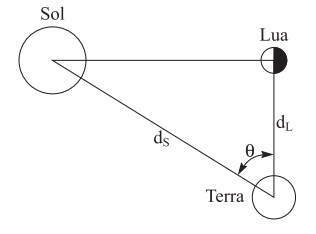
</center>

## 1.16

Em seu tratado "Cálculos com Areia", Arquimedes inventou uma notação para exprimir números muito grandes e usou-a para estimar o número de grãos de areia que caberiam no "universo" da sua época, cujo raio era identificado com a distância da Terra ao Sol. O número que encontrou, em notação moderna, seria inferior a $10^{51}$. Verifique a estimativa de Arquimedes.